<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/Sales_cost_maximize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

가.세종플러스는 세종시에 위치한 대형 슈퍼마켓이다. 세종플러스에서는 최근 줄어든 매출액을 다시 늘리기 위해 VIP 고객을 대상으로 맞춤형 마케팅 전략을 수립하고자 한다. 이를 위해 세종플러스 데이터분석팀장 고세종씨는 다음과 같이 Task를 정리하고 작업을 시작하였다
1.	확보 가능한 VIP고객의 결혼여부, 교육정보, 소득수준의 자료를 토대로 Segment별 예상 매출액을 산출한다
A.	소득수준은 $10,000 단위로 구분한다
2.	산출된 예상매출액 정보와, 각 Segment의 마케팅 비용, 총 마케팅 예산 등의 정보를 활용하여 VIP고객 대상 예상 매출액을 최대화할 수 있는 Segment 우선순위를 찾는다
문제를 간단히 하기 위한 가정 사항은 다음과 같다
-	여러 사정 상 현재 확보가능한 데이터는 고객의 결혼여부, 교육정보, 소득 수준이다
-	각 Segment에 속한 VIP고객의 예상 매출액은 모두 동일하다
-	각 Segment의 VIP고객 수는 고려하지 않는다   

나.	데이터 설명
현재 확보 가능한 데이터의 각 Column의 간단한 Description은 다음과 같다  
변수	형태  
Education: 고객의 교육 수준	Categorical  

Marital Status: 결혼 여부	Categorical

Income (단위 $): 연 소득	Numeric  

MntPurchases (단위 $): 총 구매액	Numeric




In [1]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [2]:
Data =pd.read_excel('/content/drive/MyDrive/2023년 4학년 2학기/OA/기말고사/분석 데이터.xlsx')
Data

,Education,Marital_Status,Income,MntPurchases
0,2n Cycle,Divorced,87305,1152
1,Graduation,Together,42011,189
2,Graduation,Married,28442,57
3,PhD,Divorced,70179,1034
4,PhD,Together,76140,1348
...,...,...,...,...
1795,Graduation,Together,50127,320
1796,Graduation,Married,90765,1724
1797,Graduation,Single,42160,140
1798,PhD,Married,67353,913


In [3]:
Data['Marital_Status'].unique()

array(['Divorced', 'Together', 'Married', 'Single', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [4]:
Data['Education'].unique()

array(['2n Cycle', 'Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

<Axes: >

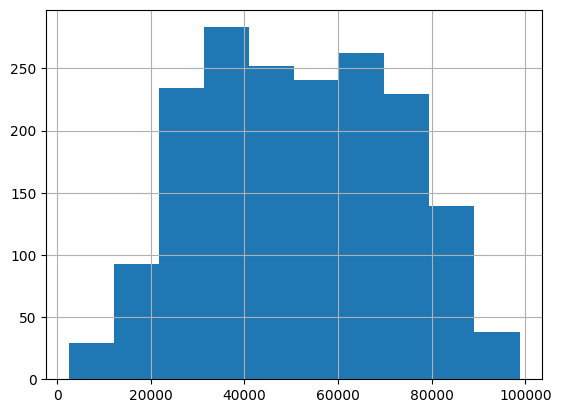

In [5]:
Data['Income'].hist()

<Axes: >

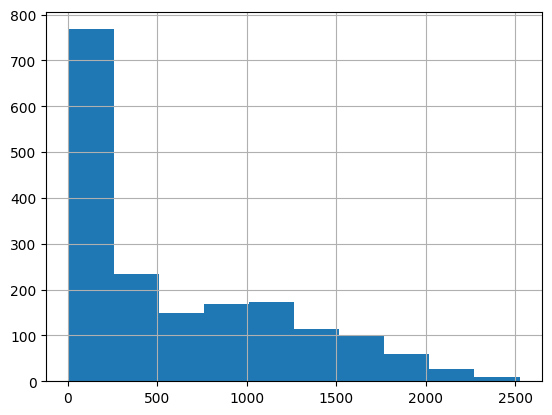

In [6]:
Data['MntPurchases'].hist()

## Segment별 예상 매출액 만들기

확보 가능한 VIP고객의 결혼여부, 교육정보, 소득수준의 자료를 토대로 Segment별 예상 매출액을 산출한다 A. 소득수준은 $10,000 단위로 구분한다

education_mapping = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}  
marital_status_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Together': 2,
    'Widow': 2,
    'Alone': 2,
    'Absurd':2,
    'YOLO' : 2
}


### Data 정리

In [7]:
data = pd.read_excel('/content/drive/MyDrive/2023년 4학년 2학기/OA/기말고사/분석 데이터.xlsx')  

education_mapping = {
    'Basic': 20,
    '2n Cycle': 10,
    'Graduation': 30,
    'Master': 40,
    'PhD': 50
}

data['Education'] = data['Education'].map(education_mapping).astype(int)


In [8]:
data['Income'] = pd.cut(data['Income'], bins=range(1, data['Income'].max() + 10000, 10000), labels=[f"{(i+10000)/100}" for i in range(0, int(data['Income'].max()) + 1, 10000)])


In [9]:
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')  # 'Income' 열의 데이터 타입을 숫자형으로 변환


In [10]:
data['Income']

0        900.0
1        500.0
2        300.0
3        800.0
4        800.0
         ...  
1795     600.0
1796    1000.0
1797     500.0
1798     700.0
1799     400.0
Name: Income, Length: 1800, dtype: float64

In [11]:
marital_status_mapping = {
    'Single': 30,
    'Married':50,
    'Divorced': 10,
    'Together': 10,
    'Widow': 10,
    'Alone': 10,
    'Absurd':10,
    'YOLO' : 10

    
}

data['Marital_Status'] = data['Marital_Status'].map(marital_status_mapping).astype(int)


In [12]:
data

,Education,Marital_Status,Income,MntPurchases
0,10,10,900.0,1152
1,30,10,500.0,189
2,30,50,300.0,57
3,50,10,800.0,1034
4,50,10,800.0,1348
...,...,...,...,...
1795,30,10,600.0,320
1796,30,50,1000.0,1724
1797,30,30,500.0,140
1798,50,50,700.0,913


In [13]:
data['cost']=data['MntPurchases'] -(data['Education']+data['Marital_Status']+data['Income'] )
data

,Education,Marital_Status,Income,MntPurchases,cost
0,10,10,900.0,1152,232.0
1,30,10,500.0,189,-351.0
2,30,50,300.0,57,-323.0
3,50,10,800.0,1034,174.0
4,50,10,800.0,1348,488.0
...,...,...,...,...,...
1795,30,10,600.0,320,-320.0
1796,30,50,1000.0,1724,644.0
1797,30,30,500.0,140,-420.0
1798,50,50,700.0,913,113.0


# Randomforest

## 그룹화 안하고

### Grid Search :Mean Squared Error: 87259.25963385169

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data_1 = data

# 변수 선택
features = ['Education', 'Marital_Status', 'Income']
target = 'cost'

# 그룹화하여 동일한 조합을 가진 데이터의 cost 평균 계산
# grouped_data = data.groupby(features)[target].mean().reset_index()

# 데이터 전처리
X = data_1[features]
y = data_1[target]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor 모델 생성
rf = RandomForestRegressor()

# GridSearchCV를 사용하여 최적의 매개변수 탐색
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 매개변수와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# 최적의 매개변수로 모델 재학습
rf_best = RandomForestRegressor(**grid_search.best_params_)
rf_best.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf_best.predict(X_test)

# 예측 결과 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 전체 데이터 예측
predicted_cost = rf_best.predict(X)

# 예측된 cost 정보 추가
data_1['PredictedCost'] = predicted_cost

# 최종 결과 확인
print(data_1)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best Score (Negative MSE): -101811.39333745114
Mean Squared Error: 87259.25963385169
      Education  Marital_Status  Income  MntPurchases   cost  PredictedCost
0            10              10   900.0          1152  232.0     437.276488
1            30              10   500.0           189 -351.0    -257.948548
2            30              50   300.0            57 -323.0    -296.725001
3            50              10   800.0          1034  174.0     461.044166
4            50              10   800.0          1348  488.0     461.044166
...         ...             ...     ...           ...    ...            ...
1795         30              10   600.0           320 -320.0     -22.256711
1796         30              50  1000.0          1724  644.0     768.458965
1797         30              30   500.0           140 -420.0    -262.022419
1798         50              50   700.0           913  113.0     345.528220

### Mean Squared Error: 88282.88470098922

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data_2 = data 

# 변수 선택
features = ['Education', 'Marital_Status', 'Income']
target = 'cost'

# 그룹화하여 동일한 조합을 가진 데이터의 cost 평균 계산
# grouped_data = grouped_data.groupby(features)[target].mean().reset_index()

# 데이터 전처리
X = data_2[features]
y = data_2[target]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Random Forest Regressor 모델 생성 및 학습
rf = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=100)
rf.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf.predict(X_test)

# 예측 결과 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 전체 데이터 예측
predicted_cost = rf.predict(X)

# 예측된 cost 정보 추가
data_2['PredictedCost'] = predicted_cost


# 최종 결과 확인
print(data_2)


Mean Squared Error: 88282.88470098922
      Education  Marital_Status  Income  MntPurchases   cost  PredictedCost
0            10              10   900.0          1152  232.0     457.759918
1            30              10   500.0           189 -351.0    -268.172453
2            30              50   300.0            57 -323.0    -309.696266
3            50              10   800.0          1034  174.0     465.723090
4            50              10   800.0          1348  488.0     465.723090
...         ...             ...     ...           ...    ...            ...
1795         30              10   600.0           320 -320.0     -38.560294
1796         30              50  1000.0          1724  644.0     753.328048
1797         30              30   500.0           140 -420.0    -273.309498
1798         50              50   700.0           913  113.0     242.955248
1799         40              10   400.0            71 -379.0    -311.152634

[1800 rows x 6 columns]


## 그룹화 안하고 구매로 예측


### Mean Squared Error: 87773.60173706783

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data_2 = data 

# 변수 선택
features = ['Education', 'Marital_Status', 'Income']
target = 'MntPurchases'

# 그룹화하여 동일한 조합을 가진 데이터의 cost 평균 계산
# grouped_data = grouped_data.groupby(features)[target].mean().reset_index()

# 데이터 전처리
X = data_2[features]
y = data_2[target]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Random Forest Regressor 모델 생성 및 학습
rf = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=100)
rf.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf.predict(X_test)

# 예측 결과 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 전체 데이터 예측
predicted_cost = rf.predict(X)

# 예측된 cost 정보 추가
data_2['PredictedMnt'] = predicted_cost


# 최종 결과 확인
print(data_2)


Mean Squared Error: 87773.60173706783
      Education  Marital_Status  Income  MntPurchases   cost  PredictedCost  \
0            10              10   900.0          1152  232.0     457.759918   
1            30              10   500.0           189 -351.0    -268.172453   
2            30              50   300.0            57 -323.0    -309.696266   
3            50              10   800.0          1034  174.0     465.723090   
4            50              10   800.0          1348  488.0     465.723090   
...         ...             ...     ...           ...    ...            ...   
1795         30              10   600.0           320 -320.0     -38.560294   
1796         30              50  1000.0          1724  644.0     753.328048   
1797         30              30   500.0           140 -420.0    -273.309498   
1798         50              50   700.0           913  113.0     242.955248   
1799         40              10   400.0            71 -379.0    -311.152634   

      Predict

## 그룹화 하고


### Grid Search : Mean Squared Error: 13995.889951568855

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data = data

# 변수 선택
features = ['Education', 'Marital_Status', 'Income']
target = 'cost'

# 그룹화하여 동일한 조합을 가진 데이터의 cost 평균 계산
grouped_data = data.groupby(features)[target].mean().reset_index()

# 데이터 전처리
X = grouped_data[features]
y = grouped_data[target]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

# Random Forest Regressor 모델 생성
rf = RandomForestRegressor()

# GridSearchCV를 사용하여 최적의 매개변수 탐색
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 매개변수와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# 최적의 매개변수로 모델 재학습
rf_best = RandomForestRegressor(**grid_search.best_params_)
rf_best.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf_best.predict(X_test)

# 예측 결과 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 전체 데이터 예측
predicted_cost = rf_best.predict(X)

# 예측된 cost 정보 추가
grouped_data['PredictedCost'] = predicted_cost

# 최종 결과 확인
print(grouped_data)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Score (Negative MSE): -26434.39952946561
Mean Squared Error: 13995.889951568855
     Education  Marital_Status  Income        cost  PredictedCost
0           10              10   100.0  -43.500000     -52.146080
1           10              10   200.0 -149.166667    -206.048925
2           10              10   300.0 -237.076923    -232.340756
3           10              10   400.0 -326.875000    -229.519780
4           10              10   500.0  -14.444444    -193.382933
..         ...             ...     ...         ...            ...
116         50              50   600.0 -165.062500    -121.080162
117         50              50   700.0  328.137931     187.948617
118         50              50   800.0  468.263158     450.153090
119         50              50   900.0  492.642857     539.393683
120         50              50  1000.0  456.000000     760.643489

[121 rows x 5 columns]


### ⭐⭐⭐⭐Mean Squared Error: 10500.074878673035


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data = data 

# 변수 선택
features = ['Education', 'Marital_Status', 'Income']
target = 'cost'

# 그룹화하여 동일한 조합을 가진 데이터의 cost 평균 계산
grouped_data1 = data.groupby(features)[target].mean().reset_index()

# 데이터 전처리
X = grouped_data1[features]
y = grouped_data1[target]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Random Forest Regressor 모델 생성 및 학습
rf = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)
rf.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf.predict(X_test)

# 예측 결과 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 전체 데이터 예측
predicted_cost = rf.predict(X)

# 예측된 cost 정보 추가
grouped_data1['PredictedCost'] = predicted_cost


# 최종 결과 확인
print(grouped_data1)


Mean Squared Error: 11043.64497221328
     Education  Marital_Status  Income        cost  PredictedCost
0           10              10   100.0  -43.500000      -1.065424
1           10              10   200.0 -149.166667    -228.578544
2           10              10   300.0 -237.076923    -243.436004
3           10              10   400.0 -326.875000    -261.712035
4           10              10   500.0  -14.444444    -218.750112
..         ...             ...     ...         ...            ...
116         50              50   600.0 -165.062500     -82.849922
117         50              50   700.0  328.137931     265.078384
118         50              50   800.0  468.263158     460.381740
119         50              50   900.0  492.642857     520.015434
120         50              50  1000.0  456.000000     745.472523

[121 rows x 5 columns]


## 그룹화 하고 구매로 예측

### Mean Squared Error: 12916.542358061122

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data = data 

# 변수 선택
features = ['Education', 'Marital_Status', 'Income']
target = 'MntPurchases'

# 그룹화하여 동일한 조합을 가진 데이터의 cost 평균 계산
grouped_data = data.groupby(features)[target].mean().reset_index()

# 데이터 전처리
X = grouped_data[features]
y = grouped_data[target]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

# Random Forest Regressor 모델 생성 및 학습
rf = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=100)
rf.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf.predict(X_test)

# 예측 결과 평가 (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 전체 데이터 예측
predicted_cost = rf.predict(X)

# 예측된 cost 정보 추가
grouped_data['PredictedMnt'] = predicted_cost


# 최종 결과 확인
print(grouped_data)


Mean Squared Error: 12916.542358061122
     Education  Marital_Status  Income  MntPurchases  PredictedMnt
0           10              10   100.0     76.500000     87.486876
1           10              10   200.0     70.833333     57.981825
2           10              10   300.0     82.923077     70.728996
3           10              10   400.0     93.125000    204.452100
4           10              10   500.0    505.555556    325.776736
..         ...             ...     ...           ...           ...
116         50              50   600.0    534.937500    554.537245
117         50              50   700.0   1128.137931    971.723688
118         50              50   800.0   1368.263158   1309.096042
119         50              50   900.0   1492.642857   1525.463030
120         50              50  1000.0   1556.000000   1791.304804

[121 rows x 5 columns]


# Lp

- Grouped data에서 마케팅비용 컬럼 만들기

In [15]:
grouped_data1

,Education,Marital_Status,Income,cost,PredictedCost
0,10,10,100.0,-43.500000,-1.065424
1,10,10,200.0,-149.166667,-228.578544
2,10,10,300.0,-237.076923,-243.436004
3,10,10,400.0,-326.875000,-261.712035
4,10,10,500.0,-14.444444,-218.750112
...,...,...,...,...,...
116,50,50,600.0,-165.062500,-82.849922
117,50,50,700.0,328.137931,265.078384
118,50,50,800.0,468.263158,460.381740
119,50,50,900.0,492.642857,520.015434


In [16]:
grouped_data1['Marketing_cost']=grouped_data1['Education']+grouped_data1['Marital_Status']+grouped_data1['Income']
grouped_data1[['Marketing_cost', 'PredictedCost']]

,Marketing_cost,PredictedCost
0,120.0,-1.065424
1,220.0,-228.578544
2,320.0,-243.436004
3,420.0,-261.712035
4,520.0,-218.750112
...,...,...
116,700.0,-82.849922
117,800.0,265.078384
118,900.0,460.381740
119,1000.0,520.015434


## LP Problem

In [17]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 59.2 MB/s eta 0:00:00


### Marketing_cost 총합 5000 이하

In [58]:
import pandas as pd
from pulp import *

# 데이터 불러오기
data = grouped_data1[['Marketing_cost', 'PredictedCost']] 

# 변수 선택
features = 'Marketing_cost'
target = 'PredictedCost'

# LPproblem 설정
problem = LpProblem("VIP_Selection", LpMaximize)

# 변수 생성
variables = []
for index, row in data.iterrows():
    variable = LpVariable(f"Customer_{index}", lowBound=0, upBound=1, cat='Binary')
    variables.append(variable)

# 목적 함수 설정
problem += lpSum(variables[i] * data.loc[i, target] for i in range(len(variables)))

# 제약 조건 설정
problem += lpSum(variables[i] * data.loc[i, features] for i in range(len(variables))) <= 5000

# 문제 풀이
problem.solve()

# 결과 출력
print("Variable Values:")
for variable in variables:
    print(f"{variable.name}: {variable.value()}")

print("VIP List:")
vip_list = []
for i, variable in enumerate(variables):
    if variable.varValue > 0:
        vip_list.append((i, data.loc[i, features]))
        print(f"Row: {i}, Features: {data.loc[i, features]}")

Total_cost = sum(vip[1] for vip in vip_list)
print("Total Cost:", Total_cost)


Variable Values:
Customer_0: 0.0
Customer_1: 0.0
Customer_2: 0.0
Customer_3: 0.0
Customer_4: 0.0
Customer_5: 0.0
Customer_6: 0.0
Customer_7: 0.0
Customer_8: 0.0
Customer_9: 0.0
Customer_10: 0.0
Customer_11: 0.0
Customer_12: 0.0
Customer_13: 0.0
Customer_14: 0.0
Customer_15: 0.0
Customer_16: 0.0
Customer_17: 0.0
Customer_18: 0.0
Customer_19: 0.0
Customer_20: 0.0
Customer_21: 0.0
Customer_22: 0.0
Customer_23: 0.0
Customer_24: 0.0
Customer_25: 0.0
Customer_26: 0.0
Customer_27: 0.0
Customer_28: 0.0
Customer_29: 0.0
Customer_30: 0.0
Customer_31: 0.0
Customer_32: 0.0
Customer_33: 0.0
Customer_34: 0.0
Customer_35: 0.0
Customer_36: 0.0
Customer_37: 0.0
Customer_38: 0.0
Customer_39: 0.0
Customer_40: 0.0
Customer_41: 0.0
Customer_42: 0.0
Customer_43: 0.0
Customer_44: 1.0
Customer_45: 0.0
Customer_46: 0.0
Customer_47: 0.0
Customer_48: 0.0
Customer_49: 0.0
Customer_50: 0.0
Customer_51: 0.0
Customer_52: 0.0
Customer_53: 0.0
Customer_54: 0.0
Customer_55: 0.0
Customer_56: 0.0
Customer_57: 0.0
Custome

- VIP List

In [62]:
grouped_data1.loc[[44,71,72,82,91]]

,Education,Marital_Status,Income,cost,PredictedCost,Marketing_cost
44,30,10,1000.0,1141.666667,756.047279,1040.0
71,40,10,800.0,536.384615,491.699391,850.0
72,40,10,900.0,620.000000,554.864483,950.0
82,40,30,1000.0,928.000000,758.931027,1070.0
91,40,50,1000.0,1129.000000,755.779080,1090.0


- 총이익 합

In [67]:
sum(grouped_data1.loc[[44,71,72,82,91]]['PredictedCost'])

3317.3212593981475

### Marketing_cost 총합 30000이하

In [63]:
import pandas as pd
from pulp import *

# 데이터 불러오기
data = grouped_data1[['Marketing_cost', 'PredictedCost']] 

# 변수 선택
features = 'Marketing_cost'
target = 'PredictedCost'

# LPproblem 설정
problem = LpProblem("VIP_Selection", LpMaximize)

# 변수 생성
variables = []
for index, row in data.iterrows():
    variable = LpVariable(f"Customer_{index}", lowBound=0, upBound=1, cat='Binary')
    variables.append(variable)

# 목적 함수 설정
problem += lpSum(variables[i] * data.loc[i, target] for i in range(len(variables)))

# 제약 조건 설정
problem += lpSum(variables[i] * data.loc[i, features] for i in range(len(variables))) <= 30000

# 문제 풀이
problem.solve()

# 결과 출력
print("Variable Values:")
for variable in variables:
    print(f"{variable.name}: {variable.value()}")

print("VIP List:")
vip_list = []
for i, variable in enumerate(variables):
    if variable.varValue > 0:
        vip_list.append((i, data.loc[i, features]))
        print(f"Row: {i}, Features: {data.loc[i, features]}")

Total_cost = sum(vip[1] for vip in vip_list)
print("Total Cost:", Total_cost)


Variable Values:
Customer_0: 0.0
Customer_1: 0.0
Customer_2: 0.0
Customer_3: 0.0
Customer_4: 0.0
Customer_5: 0.0
Customer_6: 0.0
Customer_7: 1.0
Customer_8: 1.0
Customer_9: 1.0
Customer_10: 0.0
Customer_11: 0.0
Customer_12: 0.0
Customer_13: 0.0
Customer_14: 0.0
Customer_15: 0.0
Customer_16: 1.0
Customer_17: 0.0
Customer_18: 0.0
Customer_19: 0.0
Customer_20: 0.0
Customer_21: 0.0
Customer_22: 0.0
Customer_23: 0.0
Customer_24: 0.0
Customer_25: 1.0
Customer_26: 1.0
Customer_27: 0.0
Customer_28: 0.0
Customer_29: 0.0
Customer_30: 0.0
Customer_31: 0.0
Customer_32: 0.0
Customer_33: 0.0
Customer_34: 0.0
Customer_35: 0.0
Customer_36: 0.0
Customer_37: 0.0
Customer_38: 0.0
Customer_39: 0.0
Customer_40: 0.0
Customer_41: 0.0
Customer_42: 1.0
Customer_43: 1.0
Customer_44: 1.0
Customer_45: 0.0
Customer_46: 0.0
Customer_47: 0.0
Customer_48: 0.0
Customer_49: 0.0
Customer_50: 0.0
Customer_51: 0.0
Customer_52: 1.0
Customer_53: 1.0
Customer_54: 1.0
Customer_55: 0.0
Customer_56: 0.0
Customer_57: 0.0
Custome

In [64]:
vip_num = [vip[0] for vip in vip_list]
grouped_data1.loc[vip_num]

,Education,Marital_Status,Income,cost,PredictedCost,Marketing_cost
7,10,10,800.0,100.200000,296.160700,820.0
8,10,10,900.0,347.000000,367.942497,920.0
9,10,10,1000.0,243.000000,613.699098,1020.0
16,10,30,900.0,395.166667,363.682159,940.0
25,10,50,900.0,448.400000,357.051347,960.0
26,20,10,100.0,-64.000000,1.890977,130.0
42,30,10,800.0,434.693548,428.698446,840.0
43,30,10,900.0,624.387097,518.389541,940.0
44,30,10,1000.0,1141.666667,756.047279,1040.0
52,30,30,800.0,370.448276,421.780440,860.0


In [66]:
sum(grouped_data1.loc[vip_num]['PredictedCost'])

16902.522585926945